In [1]:
import pandas as pd
from io import StringIO
from plotnine import *

sio = StringIO(
    """Year,Platform,Count
2017,Illumina + Ion Torrent,542
2018,Illumina + Ion Torrent,1016
2019,Illumina + Ion Torrent,737
2020,Illumina + Ion Torrent,932
2021,Illumina + Ion Torrent,1698
2022,Illumina + Ion Torrent,1092
2023,Illumina + Ion Torrent,428
2017,Nanopore,0
2018,Nanopore,32
2019,Nanopore,69
2020,Nanopore,136
2021,Nanopore,186
2022,Nanopore,2432
2023,Nanopore,3183
"""
)
df_platform = pd.read_csv(sio)

In [2]:
df_platform

,Year,Platform,Count
0,2017,Illumina + Ion Torrent,542
1,2018,Illumina + Ion Torrent,1016
2,2019,Illumina + Ion Torrent,737
3,2020,Illumina + Ion Torrent,932
4,2021,Illumina + Ion Torrent,1698
5,2022,Illumina + Ion Torrent,1092
6,2023,Illumina + Ion Torrent,428
7,2017,Nanopore,0
8,2018,Nanopore,32
9,2019,Nanopore,69


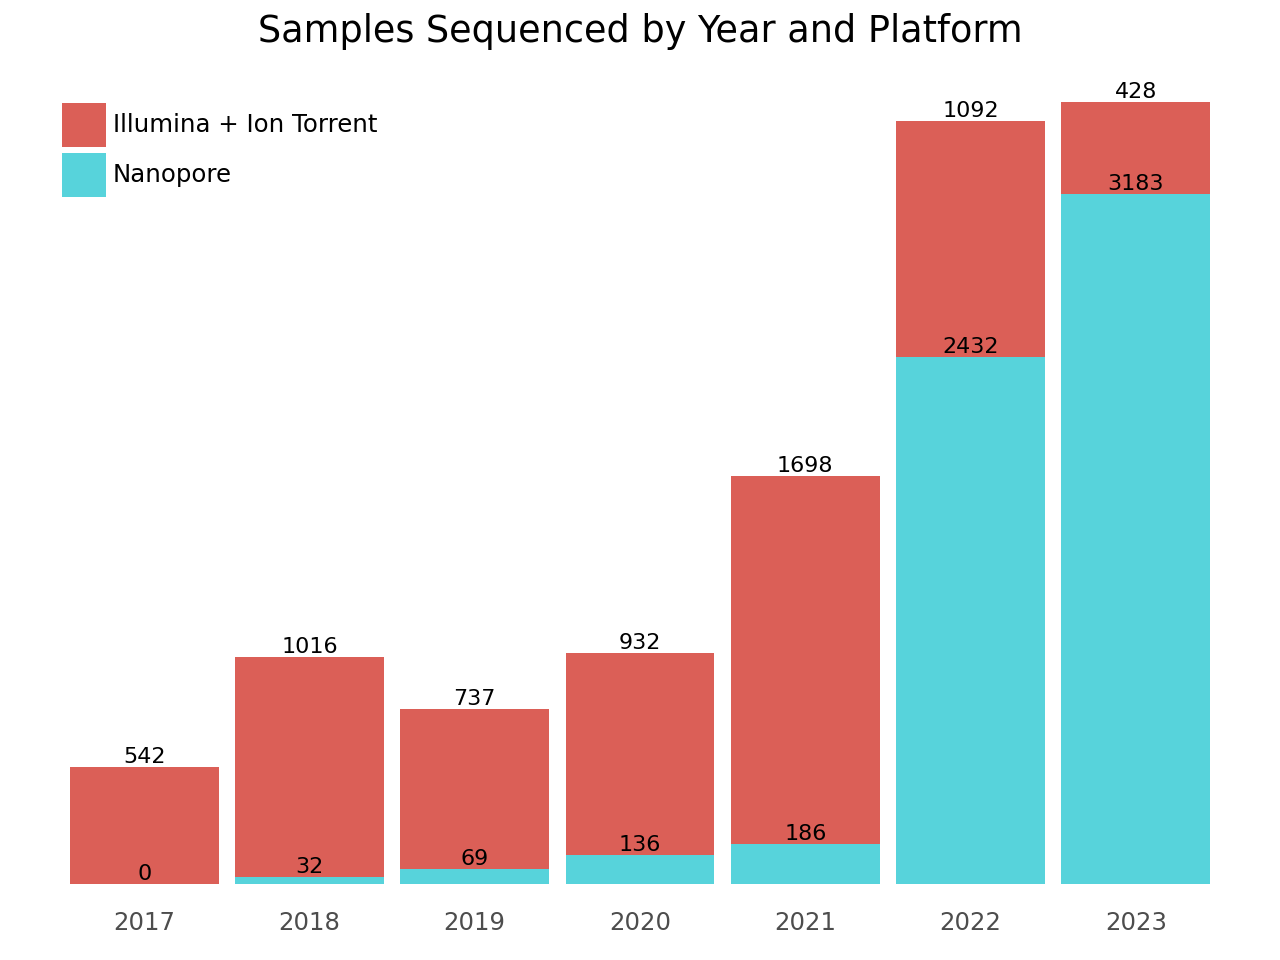

In [3]:
plot = (
    ggplot(df_platform, aes(x='Year', y='Count', fill='Platform'))
    + geom_bar(stat='identity', position='stack')
    + geom_text(aes(label='Count'), position='stack', ha='center', va='bottom', size=8)
    + theme_minimal()
    + labs(
        # y='Samples Sequenced',
        y='',
        x='',
        title='Samples Sequenced by Year and Platform',
    )
    # show every x-axis label
    + scale_x_continuous(breaks=range(2017, 2024))
    # hide y-axis labels, hide all grid lines
    + theme(
        axis_text_x=element_text(vjust=-1), 
        axis_text_y=element_text(visible=False),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        legend_position=(0.05, 0.95),
        legend_title=element_blank(),
    )
)
plot

In [5]:
ggsave(plot, 'seq-over-time.pdf', width=6, height=4, dpi=300, verbose=False)